In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import sys
sys.path.insert(0,'..')

%load_ext autoreload
%autoreload 2

import os,sys,inspect
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import plotly.io as pio
pio.renderers.default='notebook'



# todo: load provided dataset, initial overview, summary, ideas

In [5]:
df_tweets = pd.read_csv("../data/provided_offline/tweets.csv")

In [6]:
df_tweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1868981054.000,ryanmaxwell_1,1458671502000.000,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,712346027861405696.000,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2571870453.000,detroitdailynew,1476133020000.000,2016-10-10 20:57:00,0.000,False,0.000,"Clinton: Trump should’ve apologized more, atta...",785584942356967424.000,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1710804738.000,cookncooks,1487767423000.000,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,834383165359788032.000,NaN,[],[],POSTED,[],NaN,NaN
3,2584152521.000,queenofthewo,1482764801000.000,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,813400649912217600.000,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1768259989.000,mrclydepratt,1501986984000.000,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,894024327049363456.000,NaN,[],[],POSTED,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203477,1518857420.000,nojonathonno,1478002386000.000,2016-11-01 12:13:06,0.000,False,0.000,"RT @AndreaChalupa: In intel circles, the story...",793425633753915392.000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""andreachalupa""]",793263468447236096.000,NaN
203478,2587100717.000,judelambertusa,1434589475000.000,2015-06-18 01:04:35,NaN,NaN,NaN,RT @KansasCityDNews: Tonganoxie police: Middle...,611338685867552768.000,NaN,"[""local""]",[],POSTED,[],NaN,NaN
203479,2671070290.000,patriotblake,1484074248000.000,2017-01-10 18:50:48,NaN,NaN,NaN,RT @signsinyork: Getting the right #company lo...,818892866747584512.000,NaN,"[""company""]",[],POSTED,[],NaN,NaN
203480,2630842499.000,dailysandiego,1479678547000.000,2016-11-20 21:49:07,0.000,False,0.000,The Latest: Obama affirms continuity of ties w...,800455962146537472.000,"<a href=""http://twibble.io"" rel=""nofollow"">Twi...",[],"[""http://www.cbs8.com/story/33754799/the-lates...",POSTED,[],NaN,NaN


In [7]:
df_tweets.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203482 entries, 0 to 203481
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                195417 non-null  float64
 1   user_key               203482 non-null  object 
 2   created_at             203461 non-null  float64
 3   created_str            203461 non-null  object 
 4   retweet_count          58083 non-null   float64
 5   retweeted              58083 non-null   object 
 6   favorite_count         58083 non-null   float64
 7   text                   203461 non-null  object 
 8   tweet_id               201168 non-null  float64
 9   source                 58084 non-null   object 
 10  hashtags               203482 non-null  object 
 11  expanded_urls          203482 non-null  object 
 12  posted                 203482 non-null  object 
 13  mentions               203482 non-null  object 
 14  retweeted_status_id    39651 non-nul

In [8]:
# there are nulls in user_id - it needs to be handeled

In [10]:
df_tweets = df_tweets.dropna(subset=['user_id'])

In [12]:
df_tweets.shape

(195417, 16)

In [13]:
df_tweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1868981054.000,ryanmaxwell_1,1458671502000.000,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,712346027861405696.000,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2571870453.000,detroitdailynew,1476133020000.000,2016-10-10 20:57:00,0.000,False,0.000,"Clinton: Trump should’ve apologized more, atta...",785584942356967424.000,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1710804738.000,cookncooks,1487767423000.000,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,834383165359788032.000,NaN,[],[],POSTED,[],NaN,NaN
3,2584152521.000,queenofthewo,1482764801000.000,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,813400649912217600.000,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1768259989.000,mrclydepratt,1501986984000.000,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,894024327049363456.000,NaN,[],[],POSTED,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203477,1518857420.000,nojonathonno,1478002386000.000,2016-11-01 12:13:06,0.000,False,0.000,"RT @AndreaChalupa: In intel circles, the story...",793425633753915392.000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""andreachalupa""]",793263468447236096.000,NaN
203478,2587100717.000,judelambertusa,1434589475000.000,2015-06-18 01:04:35,NaN,NaN,NaN,RT @KansasCityDNews: Tonganoxie police: Middle...,611338685867552768.000,NaN,"[""local""]",[],POSTED,[],NaN,NaN
203479,2671070290.000,patriotblake,1484074248000.000,2017-01-10 18:50:48,NaN,NaN,NaN,RT @signsinyork: Getting the right #company lo...,818892866747584512.000,NaN,"[""company""]",[],POSTED,[],NaN,NaN
203480,2630842499.000,dailysandiego,1479678547000.000,2016-11-20 21:49:07,0.000,False,0.000,The Latest: Obama affirms continuity of ties w...,800455962146537472.000,"<a href=""http://twibble.io"" rel=""nofollow"">Twi...",[],"[""http://www.cbs8.com/story/33754799/the-lates...",POSTED,[],NaN,NaN


In [14]:
df_tweets.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203482 entries, 0 to 203481
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                195417 non-null  float64
 1   user_key               203482 non-null  object 
 2   created_at             203461 non-null  float64
 3   created_str            203461 non-null  object 
 4   retweet_count          58083 non-null   float64
 5   retweeted              58083 non-null   object 
 6   favorite_count         58083 non-null   float64
 7   text                   203461 non-null  object 
 8   tweet_id               201168 non-null  float64
 9   source                 58084 non-null   object 
 10  hashtags               203482 non-null  object 
 11  expanded_urls          203482 non-null  object 
 12  posted                 203482 non-null  object 
 13  mentions               203482 non-null  object 
 14  retweeted_status_id    39651 non-nul

In [15]:
#lets cast timestamp

In [19]:
df_tweets['created_str'] = pd.to_datetime(df_tweets['created_str'])

<ipython-input-19-4ad420aabeeb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
df_tweets.dtypes

user_id                         float64
user_key                         object
created_at               datetime64[ns]
created_str              datetime64[ns]
retweet_count                   float64
retweeted                        object
favorite_count                  float64
text                             object
tweet_id                        float64
source                           object
hashtags                         object
expanded_urls                    object
posted                           object
mentions                         object
retweeted_status_id             float64
in_reply_to_status_id           float64
dtype: object

###  review of raw columns

In [22]:
df_tweets.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id'],
      dtype='object')

In [18]:
import pandas_profiling

pandas_profiling.ProfileReport(df_tweets)

profile = pandas_profiling.ProfileReport(df_tweets,explorative=True,minimal=True)
# profile.to_file("model_input.html")
profile.to_widgets()



Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

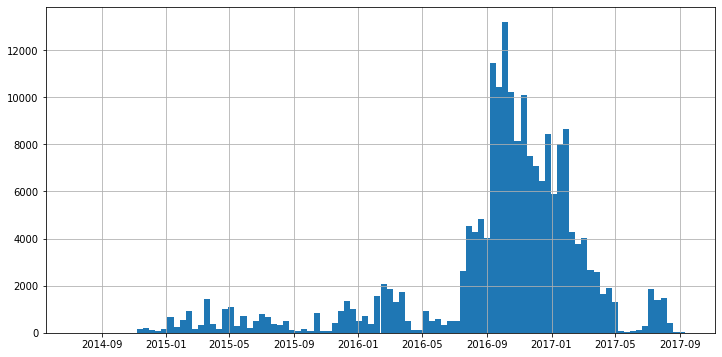

In [27]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6))

df_tweets.created_str.hist(bins=100,)

In [28]:
# The election was on November 8, 2016
# Many twitts are from before and after

<AxesSubplot:>

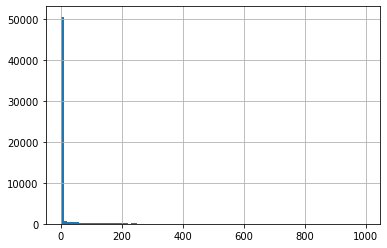

In [32]:
df_tweets[df_tweets.retweet_count < 1000].retweet_count.hist(bins=100,)

In [33]:
# generally those twitts dont seem to be re-tweeted very much

### comments:
- on the first sight, there is some pattern in time - a lot of those accounts were created 2013-2014, but are very active in mid 2016-2017
- the tweets are not very often retweeted

## Let's join users with tweets

In [44]:
df_users = pd.read_csv("../data/provided_offline/users.csv")
df_users = df_users.dropna(subset=['id'])
df_users['created_at'] = pd.to_datetime(df_users['created_at'])

In [45]:
df_users

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.000,near Utah Ave & Lighthouse an,Robby Delaware,304.000,11484.000,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",2009-01-07 04:38:02+00:00,17.000,670.000,13.000
1,100345056.000,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.000,31858.000,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,2009-12-29 23:15:22+00:00,2774.000,1055.000,35.000
2,247165706.000,"Chicago, IL",B E C K S T E R✨,650.000,6742.000,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,2011-02-04 06:38:45+00:00,7273.000,896.000,30.000
3,249538861.000,NaN,Chris Osborne,44.000,843.000,NaN,False,en,skatewake1994,NaN,2011-02-09 07:38:44+00:00,227.000,154.000,1.000
4,449689677.000,NaN,Рамзан Кадыров,94773.000,10877.000,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",2011-12-29 11:31:09+00:00,0.000,7.000,691.000
5,471868887.000,"Санкт-Петербург, Россия",Маргарита Саваж,23305.000,18401.000,Volgograd,False,ru,MargoSavazh,Честь имею. Нагло врать не умею.,2012-01-23 10:26:25+00:00,1480.000,8021.000,231.000
6,1039581360.000,Amerika,Dark Nally,22.000,22603.000,Jakarta,False,id,darknally,uptodate news!!!!,2012-12-27 13:06:58+00:00,0.000,40.000,16.000
7,1510488662.000,USA,Laila Heats,3080.000,2228.000,Eastern Time (US & Canada),False,en,lagonehoe,How can you judge me when you don’t know me?,2013-06-12 13:07:49+00:00,3504.000,2369.000,12.000
8,1513801268.000,USA,CC Jack,2760.000,2100.000,Eastern Time (US & Canada),False,en,YouJustCtrlC,ProBlack | Stoner | even jesus was stoned befo...,2013-06-13 16:07:23+00:00,2744.000,2700.000,10.000
9,1517678892.000,"Philadelphia, PA",Mr Moran,879.000,2044.000,Eastern Time (US & Canada),False,en,MrMoraan,I'm getting too cool for this social media shi...,2013-06-14 21:58:48+00:00,2981.000,758.000,15.000


In [47]:
df_tweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1868981054.000,ryanmaxwell_1,1970-01-01 00:24:18.671502,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,712346027861405696.000,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2571870453.000,detroitdailynew,1970-01-01 00:24:36.133020,2016-10-10 20:57:00,0.000,False,0.000,"Clinton: Trump should’ve apologized more, atta...",785584942356967424.000,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1710804738.000,cookncooks,1970-01-01 00:24:47.767423,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,834383165359788032.000,NaN,[],[],POSTED,[],NaN,NaN
3,2584152521.000,queenofthewo,1970-01-01 00:24:42.764801,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,813400649912217600.000,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1768259989.000,mrclydepratt,1970-01-01 00:25:01.986984,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,894024327049363456.000,NaN,[],[],POSTED,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203477,1518857420.000,nojonathonno,1970-01-01 00:24:38.002386,2016-11-01 12:13:06,0.000,False,0.000,"RT @AndreaChalupa: In intel circles, the story...",793425633753915392.000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""andreachalupa""]",793263468447236096.000,NaN
203478,2587100717.000,judelambertusa,1970-01-01 00:23:54.589475,2015-06-18 01:04:35,NaN,NaN,NaN,RT @KansasCityDNews: Tonganoxie police: Middle...,611338685867552768.000,NaN,"[""local""]",[],POSTED,[],NaN,NaN
203479,2671070290.000,patriotblake,1970-01-01 00:24:44.074248,2017-01-10 18:50:48,NaN,NaN,NaN,RT @signsinyork: Getting the right #company lo...,818892866747584512.000,NaN,"[""company""]",[],POSTED,[],NaN,NaN
203480,2630842499.000,dailysandiego,1970-01-01 00:24:39.678547,2016-11-20 21:49:07,0.000,False,0.000,The Latest: Obama affirms continuity of ties w...,800455962146537472.000,"<a href=""http://twibble.io"" rel=""nofollow"">Twi...",[],"[""http://www.cbs8.com/story/33754799/the-lates...",POSTED,[],NaN,NaN


In [65]:
df = df_tweets.set_index('user_id').join(df_users.set_index('id'), lsuffix='_tweet', rsuffix='_user').reset_index().rename(columns={'index': 'user_id'}).set_index('tweet_id')

In [66]:
df

,user_id,user_key,created_at_tweet,created_str,retweet_count,retweeted,favorite_count,text,source,hashtags,...,statuses_count,time_zone,verified,lang,screen_name,description,created_at_user,favourites_count,friends_count,listed_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
782958054409134080.000,18710816.000,robbydelaware,1970-01-01 00:24:35.506721,2016-10-03 14:58:41,0.000,False,0.000,Cherchez La Femme! https://t.co/SFTaNlLwlf,"<a href=""http://twitter.com/#!/download/ipad"" ...",[],...,11484.000,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",2009-01-07 04:38:02+00:00,17.000,670.000,13.000
779740543370792960.000,18710816.000,robbydelaware,1970-01-01 00:24:34.739607,2016-09-24 17:53:27,0.000,False,0.000,"Not exactly ""bombing the shit outta em"" - Trum...","<a href=""http://twitter.com/#!/download/ipad"" ...",[],...,11484.000,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",2009-01-07 04:38:02+00:00,17.000,670.000,13.000
785013987163471872.000,18710816.000,robbydelaware,1970-01-01 00:24:35.996894,2016-10-09 07:08:14,0.000,False,0.000,"Once again, Jeff Zucker a 90s-era ""if it bleed...","<a href=""http://twitter.com/#!/download/ipad"" ...",[],...,11484.000,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",2009-01-07 04:38:02+00:00,17.000,670.000,13.000
790841341643198464.000,18710816.000,robbydelaware,1970-01-01 00:24:37.386243,2016-10-25 09:04:03,0.000,False,0.000,I'm sure parents concerned about the profanity...,"<a href=""http://twitter.com/#!/download/ipad"" ...",[],...,11484.000,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",2009-01-07 04:38:02+00:00,17.000,670.000,13.000
792947865333161984.000,18710816.000,robbydelaware,1970-01-01 00:24:37.888478,2016-10-31 04:34:38,0.000,False,0.000,Trump supporters remind me of Bolsheviks. Marx...,"<a href=""http://www.apple.com/"" rel=""nofollow""...",[],...,11484.000,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",2009-01-07 04:38:02+00:00,17.000,670.000,13.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796711567798648832.000,789266125485998080.000,worldnewspoli,1970-01-01 00:24:38.785814,2016-11-10 13:50:14,0.000,False,0.000,VIDEO : Tomi Lahren’s Final Thoughts on the El...,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...",[],...,638.000,NaN,False,es,WorldnewsPoli,"All major information policy in the world, we ...",2016-10-21 00:44:43+00:00,0.000,4755.000,4.000
793859016141090816.000,789266125485998080.000,worldnewspoli,1970-01-01 00:24:38.105713,2016-11-02 16:55:13,1.000,False,1.000,BREAKING: Hillary Clinton Just Got The Worst N...,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...",[],...,638.000,NaN,False,es,WorldnewsPoli,"All major information policy in the world, we ...",2016-10-21 00:44:43+00:00,0.000,4755.000,4.000
795967280723042304.000,789266125485998080.000,worldnewspoli,1970-01-01 00:24:38.608362,2016-11-08 12:32:42,0.000,False,0.000,VIDEO : Dinesh D’Souza Delivers Powerful #Elec...,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...","[""ElectionDay""]",...,638.000,NaN,False,es,WorldnewsPoli,"All major information policy in the world, we ...",2016-10-21 00:44:43+00:00,0.000,4755.000,4.000


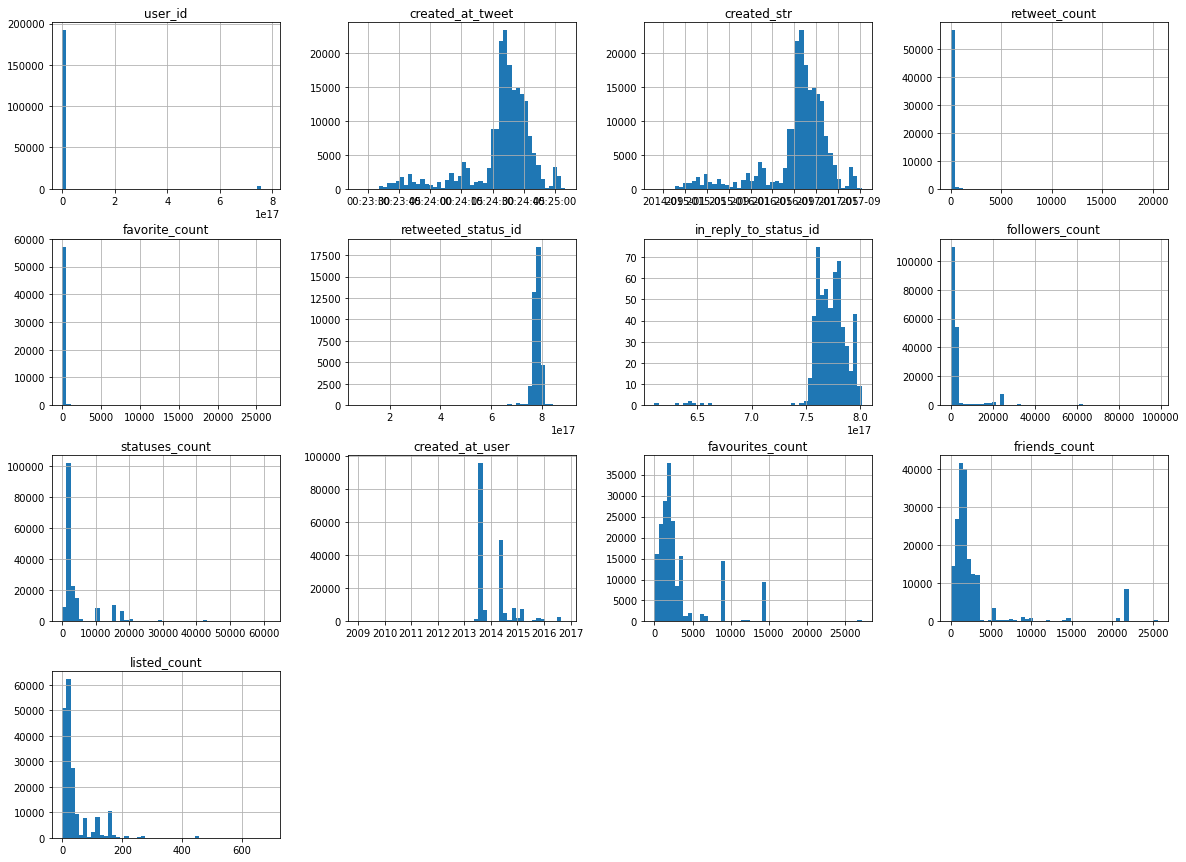

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## Let's read through few tweets



In [80]:
for i in range(0,100):
    s = df.sample()
    print(s.text.iloc[0])

Clinton Holds Democrats in Immediate Aftermath of FBI E-mail Bombshell  #politics
Donald Trump: "We've been doing very, very well with the Latinos."
#LatinosForTrump https://t.co/4Dn6MlmNnL
11 most exciting moments of Trump's RNC and Clinton's DNC  #politics
RT @Solely_Toya: #ItsRiskyTo do most things worth doing..
RT @bob_owens: As opposed to now, where he's just arrogant and incompetent. https://t.co/H9CtdBuRhz
RT @ChristiChat: MT @WayneBogda: @POTUS Is this where you tell them you're building a barrier? #WakeUpAmerica http://t.co/4icm8UuErH #PJNET…
RT @limitlesskait: is there a more repulsive figure than @realDonaldTrump in the annals of American history? #ImWithThem #trump  https://t.…
RT @TheTruth24US: Best Quotes From Kim Kardashian and Kanye West on Parenthood http://t.co/8jxJSxQHwS
RT @jimmyrhythm: Non-alcoholic  beer #ReasonsToProtest
RT @karen_erotoo1: Desperate Racist Black Caucus Blames Trump For Obama Lies About His Birth, Past https://t.co/WuR1YbcYQW
RT @law_tha_dragon: S

RT @MLKstudios: Netanyahu: If Israel Doesn't Act Wisely Ahead of End of Obama's Term, We May Endanger Entire Settlement Enterprise https://…
RT @Dreamweasel: Why are bread-and-butter pickles a thing?

 #RejectedDebateTopics
acting reckless is pretty awesome sometimes
Trump Says Virginia Lining Up ‘Violent Felons’ to Back Clinton  #politics
RT @GloomandDoom1: #NYC Why Would #Terrorists "Hide" Bombs in Places where NOT Likely to Hurt Many People? #foxnews #nyt #cnn #wapo #npr #n…
RT @eph4_15: MUST SEE CREEPY Donald Trump Facial Expressions--Our Next President? -- https://t.co/ufW2hml8bW #PJNET #CCOT #CruzCrew
...who will first take your job #WakeUpAmerica https://t.co/TcDlAKzgeo
RT @dbernstein: That phrase occurs over images of George Soros &amp; Janet Yellen. That, my friends, is textbook anti-Semitism. https://t.co/ns…
RT @hotdog7826: Trump Reveals His True Character By Claiming That Hurting Women Is Entertainment via @politicususa https://t.co/jDEsibOOPx
Mayerthorpe Vice #MakeTVShowsC

# comments

It looks to me that the carrier of most valuable info if a given tweet is fake or not is the tweet itself

We should extend the dataset with more tweets from that period and see if the classifier will be able to recognise those

there are acctually a lot of polytical content, f.e. commenting on politicians. f.e.:
    
    RT @GaetaSusan: Hillary admires Merkel!!?? Merkel⏩ flooded Germany⏩Muslim Syrian Refugees⏩Raping Women &amp; Destroying that Country!  https://…

            
There are also twets that don't seem to have polytical flavor:

    RT @twitsnotnice: Fatten Santa up  #ToDoListBeforeChristmas https://t.co/pF23qKnfLw
